In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import xlrd
import numpy as np
import matplotlib.ticker as mtick
from openpyxl import load_workbook
from matplotlib_venn import venn2, venn3
def group(list):
    grouped=[]
    nonpolar=['G','A','V','L','I','P','F','W','M']
    polar=['S','T','C','Y','N','Q']
    basic=['K','R','H']
    acidic=['D','E']
    for item in list:
        new_item=''
        for letter in item:
            if letter in nonpolar:
                new_item+='N'
            if letter in polar:
                new_item+='P'
            if letter in basic:
                new_item+='B'
            if letter in acidic:
                new_item+='A'
        grouped.append(new_item)
    return grouped

def get_letter_frequency(list):
    letters={
        'A':0,
        'G':0,
        'V':0,
        'L':0,
        'I':0,
        'P':0,
        'F':0,
        'W':0,
        'M':0,
        'S':0,
        'T':0,
        'C':0,
        'Y':0,
        'N':0,
        'Q':0,
        'K':0,
        'R':0,
        'H':0,
        'D':0,
        'E':0
    }
    for word in list:
        for letter in word:
            letters[letter] +=1
    return letters

Normal_aminoacids={ #From swissprot
        'A':8.25,
        'G':7.08,
        'V':6.86,
        'L':9.65,
        'I':5.92,
        'P':4.73,
        'F':3.68,
        'W':1.09,
        'M':2.41,
        'S':6.63,
        'T':5.35,
        'C':1.38,
        'Y':2.92,
        'N':4.06,
        'Q':3.93,
        'K':5.81,
        'R':5.53,
        'H':2.27,
        'D':5.46,
        'E':6.72
    }

## Proteins of interest: 
FIBA
FIBB
FIBG
ELNE
THRB
CATG
A2AP
ITIH4
KNG1
A1AT
CFAB
CO3
CO9
SAAI
DCD
FETUA
ALBU

In [203]:
protein="THRB"  ##change for protein of interest

folder='protein-peptide_sample_WF'
files = os.listdir(folder)
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
wf_venn=[]
df_wf=pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(folder+ '/' +file)
    data['Protein Accession'].fillna("Not available", inplace = True) 
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data = data.loc[(data['#Feature'] >= 0)]
    df_wf=df_wf.append(data)
    data=data[data["Protein Accession"].str.contains(protein, na=False)]
    wf_venn.append(data['Peptide'])
df_wf['count']=1

df_wf=df_wf[['Peptide','Protein Accession','Start','End','#Feature','count']]
df_wf=df_wf.groupby(by=['Peptide', 'Protein Accession'], as_index=False).sum()
df_wf=df_wf.rename(columns={'#Feature':'feat_wf'})
df_wf['N-cut']=df_wf['Peptide'].apply(lambda x: x[0:4])
df_wf['C-cut']=df_wf['Peptide'].apply(lambda x: x[-4::1])


folder='protein-peptide_sample_ninf'
files = os.listdir(folder)
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_ninf=pd.DataFrame()
ninf_venn=[]
for file in files:
    data = pd.read_excel(folder+ '/' +file)
    data['Protein Accession'].fillna("Not available", inplace = True) 
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data = data.loc[(data['#Feature'] >= 0)]
    df_ninf=df_ninf.append(data)
    data=data[data["Protein Accession"].str.contains(protein, na=False)]
    ninf_venn.append(data['Peptide'])
df_ninf['count']=1

df_ninf=df_ninf[['Peptide','Protein Accession','Start', 'End','#Feature','count']]
df_ninf=df_ninf.groupby(by=['Peptide', 'Protein Accession'], as_index=False).sum()
df_ninf=df_ninf.rename(columns={'#Feature':'feat_ninf'})
df_ninf['N-cut']=df_ninf['Peptide'].apply(lambda x: x[0:4])
df_ninf['C-cut']=df_ninf['Peptide'].apply(lambda x: x[-4::1])

folder= 'protein-peptide_sample_inf'
files = os.listdir(folder)
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
inf_venn=[]
df_inf=pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(folder+ '/' +file)
    data['Protein Accession'].fillna("Not available", inplace = True) 
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data = data.loc[(data['#Feature'] >= 0)]
    df_inf=df_inf.append(data)
    data=data[data["Protein Accession"].str.contains(protein, na=False)]
    inf_venn.append(data['Peptide'])
df_inf['count']=1


df_inf=df_inf[['Peptide','Protein Accession','Start','End','#Feature','count']]
df_inf=df_inf.groupby(by=['Peptide', 'Protein Accession'], as_index=False).sum()
df_inf=df_inf.rename(columns={'#Feature':'feat_inf'})
df_inf['N-cut']=df_inf['Peptide'].apply(lambda x: x[0:4])
df_inf['C-cut']=df_inf['Peptide'].apply(lambda x: x[-4::1])
df_inf

,Peptide,Protein Accession,Start,End,feat_inf,count,N-cut,C-cut
0,AAAPPAEKAPVK,sp|P16403|H12_HUMAN,22,40,3,2,AAAP,APVK
1,AAESSLTKDALVLTPASLWKPSSPVSQ,sp|Q8TDL5|BPIB1_HUMAN,918,968,2,2,AAES,PVSQ
2,AAFNSGKVDIVA,sp|P04406|G3P_HUMAN,44,62,4,2,AAFN,DIVA
3,AAGEEPSKEEGEPKK,sp|P80723|BASP1_HUMAN,137,149,1,1,AAGE,EPKK
4,AAGGPPGGPQVNPIPVT,sp|P13498|CY24A_HUMAN,176,190,1,1,AAGG,IPVT
...,...,...,...,...,...,...,...,...
7523,YVYKVLKQVHPDTGISSKA,sp|P58876|H2B1D_HUMAN,84,116,4,2,YVYK,SSKA
7524,YVYKVLKQVHPDTGISSKAMGIM,sp|P58876|H2B1D_HUMAN,84,124,1,2,YVYK,MGIM
7525,YWESAKTAAQNLYEKTY,sp|P02655|APOC2_HUMAN,48,62,1,1,YWES,EKTY
7526,YYAVAVVKK,sp|P02787|TRFE_HUMAN,230,242,3,2,YYAV,VVKK


In [204]:
df_all=df_wf.append(df_ninf)
df_all=df_all.append(df_inf)
df_all=df_all.groupby(by=['Peptide','Protein Accession'], as_index=False).sum()
df_all['Start']=df_all['Start']/df_all['count']
df_all['End']=df_all['End']/df_all['count']
df_all_protein=df_all[df_all["Protein Accession"].str.contains(protein, na=False)]
df_all_protein['Difference']=df_all_protein['feat_inf']-df_all_protein['feat_ninf']
df_all_protein.sort_values(by='Difference', ascending=False)

C:\Users\erikh\anaconda3\envs\excelanalysis\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Peptide,Protein Accession,Start,End,feat_wf,count,feat_ninf,feat_inf,Difference
1860,DGKYGFYTHVFR,sp|P00734|THRB_HUMAN,598.0,607.0,0.0,2,0.0,4.0,4.0
8412,LEDKTERELLE,sp|P00734|THRB_HUMAN,348.0,356.0,0.0,1,0.0,2.0,2.0
1859,DGKYGFYTHVF,sp|P00734|THRB_HUMAN,598.0,606.0,0.0,1,0.0,2.0,2.0
7284,KSLEDKTERELLE,sp|P00734|THRB_HUMAN,346.0,356.0,18.0,6,0.0,2.0,2.0
16238,VNLPIVERPVC,sp|P00734|THRB_HUMAN,527.0,535.0,0.0,1,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
3109,FSDYIHPVC,sp|P00734|THRB_HUMAN,475.0,481.0,18.0,10,6.0,3.0,-3.0
8514,LESYIDGRI,sp|P00734|THRB_HUMAN,357.0,363.0,0.0,3,4.0,1.0,-3.0
13254,RTATSEYQTFFNPRT,sp|P00734|THRB_HUMAN,315.0,327.0,25.0,8,5.0,0.0,-5.0
7290,KSLEDKTERELLESYIDGRI,sp|P00734|THRB_HUMAN,346.0,363.0,7.0,5,10.0,3.0,-7.0


### Sorting ny terminal

In [148]:
N_term = df_all_protein.groupby('N-cut').sum()
C_term = df_all_protein.groupby('C-cut').sum()
N_term.sort_values(['Difference'], ascending=False)

,Start,End,feat_wf,count,feat_ninf,feat_inf,Difference
N-cut,,,,,,,
FKDL,144.0,180.000000,10.0,15,5.0,22.0,17.0
HKDD,260.0,278.000000,0.0,4,0.0,17.0,17.0
FAEV,1012.0,1052.000000,2.0,10,2.0,17.0,15.0
VRYT,1302.0,1344.000000,5.0,11,7.0,20.0,13.0
VDET,2590.0,2633.000000,12.0,23,15.0,27.0,12.0
...,...,...,...,...,...,...,...
RRHP,530.0,555.000000,0.0,12,26.0,18.0,-8.0
RDAH,325.0,562.000000,19.0,54,39.0,31.0,-8.0
KKVP,3066.0,3158.000000,7.0,33,35.0,25.0,-10.0


### Venn diagram of protein of interest

C:\Users\erikh\anaconda3\envs\excelanalysis\lib\site-packages\matplotlib_venn\_venn3.py:53: UserWarning: Circle A has zero area
  warnings.warn("Circle A has zero area")
C:\Users\erikh\anaconda3\envs\excelanalysis\lib\site-packages\matplotlib_venn\_venn3.py:57: UserWarning: Circle B has zero area
  warnings.warn("Circle B has zero area")


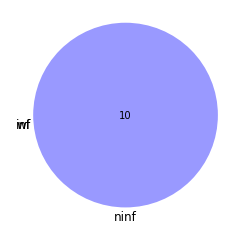

In [137]:
v=venn3([set(inf_venn[0]),set(wf_venn[0]),set(ninf_venn[0])], set_labels=('inf','wf','ninf'))

## Only peptides in inf

In [164]:
df_inf_only = df_inf.merge(df_ninf, on=['Peptide', 'Protein Accession'], indicator = True, how='outer')
df_inf_only=df_inf_only.loc[(df_inf_only['_merge']=='left_only')]
df_inf_only=df_inf_only[df_inf_only["Protein Accession"].str.contains(protein, na=False)]
df_inf_only

,Peptide,Protein Accession,Start_x,End_x,feat_inf,count_x,Start_y,End_y,feat_ninf,count_y,_merge
133,AFAPVAQFVN,sp|P08246|ELNE_HUMAN,232.0,239.0,1.0,1.0,NaN,NaN,NaN,NaN,left_only
332,AHNLSRREPTR,sp|P08246|ELNE_HUMAN,87.0,95.0,1.0,1.0,NaN,NaN,NaN,NaN,left_only
458,ANVNVRAVRVVL,sp|P08246|ELNE_HUMAN,74.0,83.0,2.0,1.0,NaN,NaN,NaN,NaN,left_only
505,ARPHAWPFM,sp|P08246|ELNE_HUMAN,37.0,43.0,1.0,1.0,NaN,NaN,NaN,NaN,left_only
588,ATLIAPNFVM,sp|P08246|ELNE_HUMAN,58.0,65.0,5.0,3.0,NaN,NaN,NaN,NaN,left_only
753,CNGLIHGIA,sp|P08246|ELNE_HUMAN,209.0,215.0,2.0,1.0,NaN,NaN,NaN,NaN,left_only
1044,FAVQRIFENGYDPVNLLN,sp|P08246|ELNE_HUMAN,100.0,115.0,4.0,2.0,NaN,NaN,NaN,NaN,left_only
4324,MGWGLLGRN,sp|P08246|ELNE_HUMAN,155.0,161.0,2.0,1.0,NaN,NaN,NaN,NaN,left_only
5934,TRQVFAVQRIFENGYDPVNLLN,sp|P08246|ELNE_HUMAN,96.0,115.0,0.0,1.0,NaN,NaN,NaN,NaN,left_only
6088,VANVNVRAVR,sp|P08246|ELNE_HUMAN,73.0,80.0,2.0,1.0,NaN,NaN,NaN,NaN,left_only


### Format to peptigram

In [165]:
df_inf_only=df_inf_only.drop(labels=['Start_y','End_y','feat_ninf','_merge','count_y','count_x'] , axis=1)
df_inf_only=df_inf_only.rename(columns={'Peptide' : 'Peptide', "Protein Accession":"UniProt id" ,"Start_x" : "Start position", 'End_x': 'End position', 'feat_inf' : 'Intensity 1'})
#df_inf_only.to_csv('ELNE_inf_only.csv')

### Format to Ampep-deep

In [133]:
df_ampep=df_all_protein['Peptide'].astype(str)
df_ampep=df_ampep.reset_index(drop=True)
df_ampep.index='>'+df_ampep.index.astype(str)
df_ampep_array=[]
for i in range(len(df_ampep.index)):
    df_ampep_array.append(df_ampep.index[i])
    df_ampep_array.append(df_ampep[i])

df=pd.DataFrame(df_ampep_array)
df.to_clipboard(index=False,header=False)

### To CSV

In [205]:
folder='peptidomics_1/AmPEP-Deep'
files = os.listdir(folder)
ampep_res=pd.read_csv(folder+'/'+'thrb.csv')
ampep_res=ampep_res.rename(columns={'Seq':'Peptide'})
ampep_res=ampep_res.merge(df_all_protein)
ampep_res['AMP_score_inf']=ampep_res['Short Anti-Microbial.1']*ampep_res['feat_inf']
ampep_res['AMP_score_ninf']=ampep_res['Short Anti-Microbial.1']*ampep_res['feat_ninf']
amp_score_inf=ampep_res['AMP_score_inf'].sum()
amp_score_ninf=ampep_res['AMP_score_ninf'].sum()
feat_inf=ampep_res['feat_inf'].sum()
feat_ninf=ampep_res['feat_ninf'].sum()
ampep_res.to_clipboard()
print(amp_score_inf, amp_score_ninf)
print(feat_inf, feat_ninf)

9.818330000000001 17.826664
27.0 60.0


# Peptigram formatting

In [56]:
protein = 'P02768'
files = os.listdir('protein-peptide_sample_inf')
files_xls = [f for f in files if f[-3:] == 'lsx']
df_inf = pd.DataFrame()
for f in files_xls:
    data = pd.read_excel('protein-peptide_sample_inf' + '/' + f)
    data = data.loc[(data['#Feature'] >= 0)]
    data['Peptide']= data['Peptide'].str.replace('\d+', '')
    data['Peptide']= data['Peptide'].str.replace(r'\(\+\.\)', '')
    data['Peptide']= data['Peptide'].apply(lambda x: x.split('.')[1] if x[1]=='.' else x.split('.')[0] if (x[1]!='.' and x[-2]=='.') else x)
    data['count'] = 1
    data = data.groupby(by=['Peptide', 'Protein Accession'], as_index=False).sum()
    data['End'] = data['End']/ data['count']
    data['Start'] = data['Start']/ data['count']
    df_inf = df_inf.append(data)
    
df_inf['count']=1
df_inf.reset_index(inplace=True, drop=True)

files = os.listdir('protein-peptide_sample_ninf')
files_xls = [f for f in files if f[-3:] == 'lsx']
df_ninf = pd.DataFrame()
for f in files_xls:
    data = pd.read_excel('protein-peptide_sample_ninf' + '/' + f)
    data = data.loc[(data['#Feature'] >= 0)]
    data['Peptide']= data['Peptide'].str.replace('\d+', '')
    data['Peptide']= data['Peptide'].str.replace(r'\(\+\.\)', '')
    data['Peptide']= data['Peptide'].apply(lambda x: x.split('.')[1] if x[1]=='.' else x.split('.')[0] if (x[1]!='.' and x[-2]=='.') else x)
    data['count'] = 1
    data = data.groupby(by=['Peptide', 'Protein Accession'], as_index=False).sum()
    data['End'] = data['End']/ data['count']
    data['Start'] = data['Start']/ data['count']
    df_ninf = df_ninf.append(data)
    
df_ninf['count']=1
df_ninf.reset_index(inplace=True, drop=True)

files = os.listdir('protein-peptide_sample_wf')
files_xls = [f for f in files if f[-3:] == 'lsx']
df_WF = pd.DataFrame()
for f in files_xls:
    data = pd.read_excel('protein-peptide_sample_wf' + '/' + f)
    data = data.loc[(data['#Feature'] >= 0)]
    data['Peptide']= data['Peptide'].str.replace('\d+', '')
    data['Peptide']= data['Peptide'].str.replace(r'\(\+\.\)', '')
    data['Peptide']= data['Peptide'].apply(lambda x: x.split('.')[1] if x[1]=='.' else x.split('.')[0] if (x[1]!='.' and x[-2]=='.') else x)
    data['count']=1
    data = data.groupby(by=['Peptide', 'Protein Accession'], as_index=False).sum()
    data['End'] = data['End']/ data['count']
    data['Start'] = data['Start']/ data['count']
    df_WF = df_WF.append(data)
    
df_WF['count']=1
df_WF.reset_index(inplace=True, drop=True)

df_inf = df_inf[['Protein Accession', 'Peptide', '#Feature', 'Start', 'End', 'count']]
df_inf = df_inf.groupby(by=['Peptide', 'Protein Accession'], as_index=False).sum()
df_inf['End'] = df_inf['End']/ df_inf['count']
df_inf['Start'] = df_inf['Start']/ df_inf['count']
df_inf[['End', 'Start']] = df_inf[['End', 'Start']].round(decimals=0)
df_inf['#Feature'] = df_inf['#Feature']/ 3
df_inf['Protein Accession'] = df_inf['Protein Accession'].map(lambda x: str(x[3:]) )
df_inf['Protein Accession'] = df_inf['Protein Accession'].str[:6]
df_inf = df_inf[['Peptide', 'Protein Accession', 'Start', 'End', '#Feature']]
df_inf.sort_values(['#Feature'], ascending=False)
df_temp = df_inf
df_temp = df_inf.loc[df_inf['Protein Accession'] == protein]
df_temp.rename(columns={'Peptide' : 'Peptide', "Protein Accession":"UniProt id" ,"Start" : "Start position", 'End': 'End position', '#Feature' : 'Intensity 1'}, inplace=True)
print(df_temp)
df_temp.to_csv('inf_albu_peptigram.csv')

df_ninf = df_ninf[['Protein Accession', 'Peptide', '#Feature', 'Start', 'End', 'count']]
df_ninf['Start'] =df_ninf['Start'].apply(lambda x: int(x))
df_ninf['End'] =df_ninf['End'].apply(lambda x: int(x))
df_ninf = df_ninf.groupby(by=['Peptide', 'Protein Accession'], as_index=False).sum()
df_ninf['Start'] =df_ninf['Start'].apply(lambda x: int(x))
df_ninf['End'] =df_ninf['End'].apply(lambda x: int(x))
df_ninf['End'] = df_ninf['End']/ df_ninf['count']
df_ninf['Start'] = df_ninf['Start']/ df_ninf['count']
df_ninf[['End', 'Start']] = df_ninf[['End', 'Start']].round(decimals=0)
df_ninf['#Feature'] = df_ninf['#Feature']/ 3
df_ninf['Protein Accession'] = df_ninf['Protein Accession'].map(lambda x: str(x[3:]) )
df_ninf['Protein Accession'] = df_ninf['Protein Accession'].str[:6]
df_ninf = df_ninf[['Peptide', 'Protein Accession', 'Start', 'End', '#Feature']]
df_ninf.sort_values(['#Feature'], ascending=False)
df_temp = df_ninf
df_temp = df_ninf.loc[df_ninf['Protein Accession'] == protein]
df_temp.rename(columns={'Peptide' : 'Peptide', "Protein Accession":"UniProt id" ,"Start" : "Start position", 'End': 'End position', '#Feature' : 'Intensity 1'}, inplace=True)
print(df_temp)
df_temp.to_csv('ninf_albu_peptigram.csv')

df_WF = df_WF[['Protein Accession', 'Peptide', '#Feature', 'Start', 'End', 'count']]
df_WF['Start'] =df_WF['Start'].apply(lambda x: int(x))
df_WF['End'] =df_WF['End'].apply(lambda x: int(x))
df_WF = df_WF.groupby(by=['Peptide', 'Protein Accession'], as_index=False).sum()
df_WF['Start'] =df_WF['Start'].apply(lambda x: int(x))
df_WF['End'] =df_WF['End'].apply(lambda x: int(x))
df_WF['End'] = df_WF['End']/ df_WF['count']
df_WF['Start'] = df_WF['Start']/ df_WF['count']
df_WF[['End', 'Start']] = df_WF[['End', 'Start']].round(decimals=0)
df_WF['#Feature'] = df_WF['#Feature']/ 5
df_WF['Protein Accession'] = df_WF['Protein Accession'].map(lambda x: str(x[3:]) )
df_WF['Protein Accession'] = df_WF['Protein Accession'].str[:6]
df_WF = df_WF[['Peptide', 'Protein Accession', 'Start', 'End', '#Feature']]
df_WF.sort_values(['#Feature'], ascending=False)
df_temp = df_WF
df_temp = df_WF.loc[df_WF['Protein Accession'] == protein]
df_temp.rename(columns={'Peptide' : 'Peptide', "Protein Accession":"UniProt id" ,"Start" : "Start position", 'End': 'End position', '#Feature' : 'Intensity 1'}, inplace=True)
print(df_temp)
df_temp.to_csv('wf_albu_peptigram.csv')

             Peptide UniProt id  Start position  End position  Intensity 1
34         AASQAALGL     P02768           601.0         609.0     3.333333
124         AEEGKKLV     P02768           593.0         600.0     0.666667
126         AEFAEVSK     P02768           250.0         257.0     3.333333
175         AEVSKLVT     P02768           253.0         260.0     1.666667
176     AEVSKLVTDLTK     P02768           253.0         264.0     3.333333
...              ...        ...             ...           ...          ...
7129        VLHEKTPV     P02768           486.0         493.0     0.666667
7135    VLLLRLAKTYET     P02768           368.0         379.0     0.666667
7232  VPQVSTPTLVEVSR     P02768           439.0         452.0     2.333333
7534         YLYEIAR     P02768           162.0         168.0     4.333333
7594         YTKKVPQ     P02768           435.0         441.0     2.000000

[133 rows x 5 columns]
                Peptide UniProt id  Start position  End position  Intensity 

C:\Users\erikh\anaconda3\envs\excelanalysis\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\erikh\anaconda3\envs\excelanalysis\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\erikh\anaconda3\envs\excelanalysis\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erro